The purpose of the question is to **group customers** based on their credit card spending behavior using a method called **Agglomerative Clustering** (a type of hierarchical clustering). This helps businesses understand their customer base better by identifying patterns in their spending habits, such as whether certain groups spend more or less in specific areas.

Here’s how we are approaching it step-by-step:

### 1. **Load the Data:**
We start by loading the dataset (`CC_GENERAL.csv`), which contains information about customers' credit card usage.

### 2. **Prepare the Data:**
   - **Remove the Customer ID** (`CUST_ID`), since it’s just an identifier and doesn't help in clustering.
   - **Handle Missing Data**: We drop rows with missing values using `dropna(inplace=True)`, ensuring the data is clean.
   
### 3. **Standardize the Data:**
   - Since the dataset contains numbers of different scales (e.g., monthly purchase amount, credit limit), we **scale the data** using `StandardScaler` to make all features comparable. This means every feature (column) will have a similar range (mean = 0, standard deviation = 1).

### 4. **Normalize the Data:**
   - After scaling, we **normalize the data**, which transforms the data to make sure all data points follow a common scale, reducing the impact of different measurement units. This step is important for making the clustering process more effective.

### 5. **Reduce the Data Dimensions (PCA):**
   - To simplify the data and make it easier to visualize, we use **Principal Component Analysis (PCA)**, which reduces the dataset from many features (columns) to just 2 principal components (`P1` and `P2`). This helps us understand the data visually without losing too much important information.

### 6. **Visualize the Dendrogram:**
   - Before actually clustering, we visualize a **dendrogram**, which shows how the data points can be split into different clusters. This gives us an idea of how many clusters might make sense.

### 7. **Agglomerative Clustering:**
   - We then apply **Agglomerative Clustering** for different numbers of clusters (from 2 to 6). In this method, we start by considering every data point as its own cluster and gradually merge similar clusters until we reach the desired number of clusters.

### 8. **Visualize the Results:**
   - For each number of clusters (k = 2, 3, 4, 5, 6), we plot the data and color it based on the cluster assignment. This helps us visually see how the data points are grouped.

### 9. **Evaluate Clustering Quality (Silhouette Score):**
   - After clustering, we calculate the **Silhouette Score** for each number of clusters. The Silhouette Score tells us how well the data points within each cluster are grouped together (higher scores are better). It helps us decide the best number of clusters to use.

### 10. **Compare and Choose the Best Number of Clusters:**
   - We compare the Silhouette Scores for the different cluster sizes by plotting them on a bar chart. This shows which number of clusters provides the best grouping for the data.

### The Overall Goal:
We want to group customers into meaningful segments based on their spending behavior. This helps businesses understand their customers better, allowing them to tailor marketing strategies, create offers, or make business decisions based on customer group characteristics.

In summary:
- We clean and prepare the data.
- We reduce the complexity of the data using PCA.
- We try different numbers of clusters to group customers.
- We evaluate which grouping (clustering) works best using the Silhouette Score.

This process helps in understanding customer behavior better, improving decision-making!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Dropping the 'CUST_ID' column
df = df.drop('CUST_ID', axis=1)

In [5]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [11]:
# Normalizing the data
df_normalized = normalize(df_scaled)


In [12]:
# Converting the numpy array back to a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)


In [13]:
# Assuming X_normalized is your normalized data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_principal = pca.fit_transform(df_normalized)  # Replace X_normalized with your normalized DataFrame
df_principal = pd.DataFrame(df_principal, columns=['P1', 'P2'])


In [14]:
print(df_principal.head())


         P1        P2
0 -0.481788 -0.692991
1 -0.537375  0.527809
2  0.320760  0.265221
3 -0.562994 -0.503868
4  0.320512 -0.254475


In [15]:
# Print the explained variance ratio for PCA
print("\nExplained Variance Ratio by PCA Components:")
print(pca.explained_variance_ratio_)



Explained Variance Ratio by PCA Components:
[0.29255562 0.18306542]


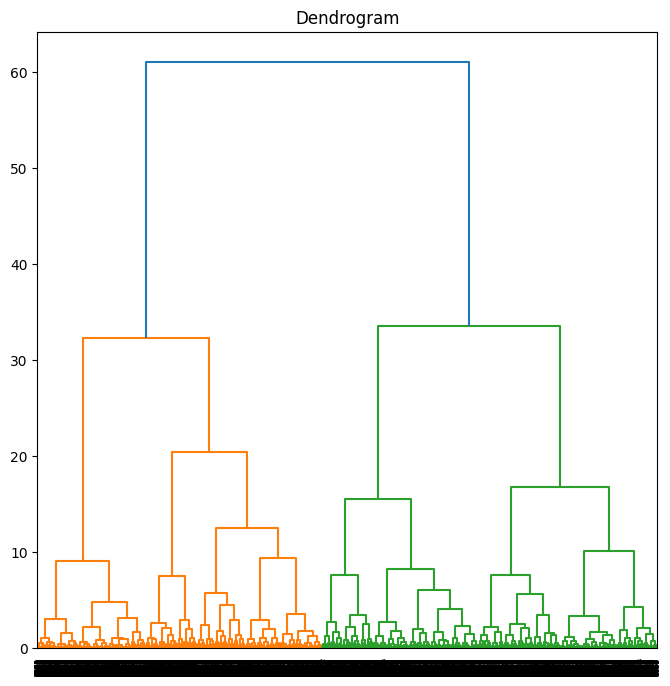

In [16]:

# Visualizing the Dendrogram
plt.figure(figsize=(8, 8))
plt.title('Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(df_principal.values, method='ward'))  # Use .values to get the numpy array
plt.show()

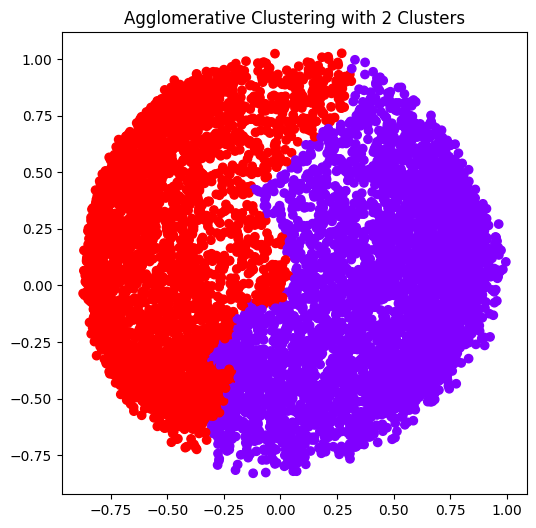

Silhouette Score for 2 clusters: 0.42321402815016196


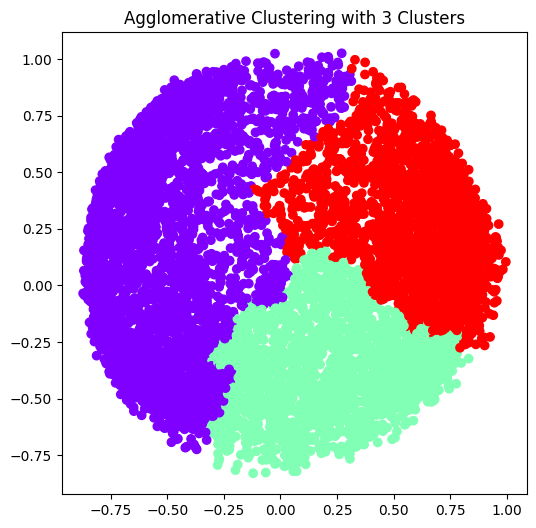

Silhouette Score for 3 clusters: 0.3648192664791028


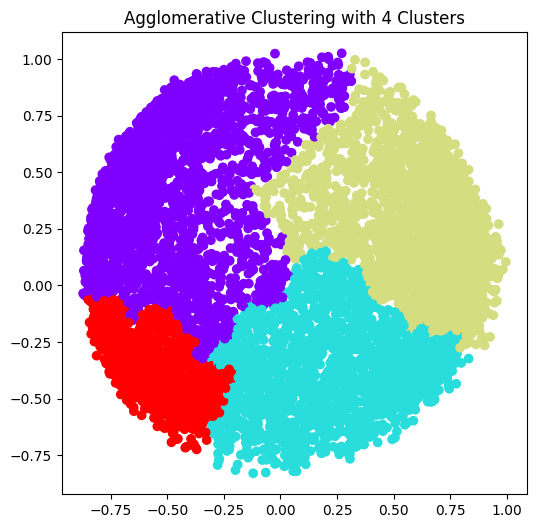

Silhouette Score for 4 clusters: 0.3557687266714984


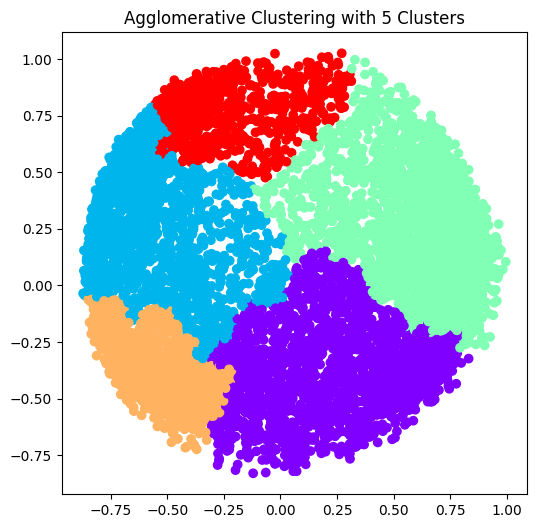

Silhouette Score for 5 clusters: 0.3450420282319213


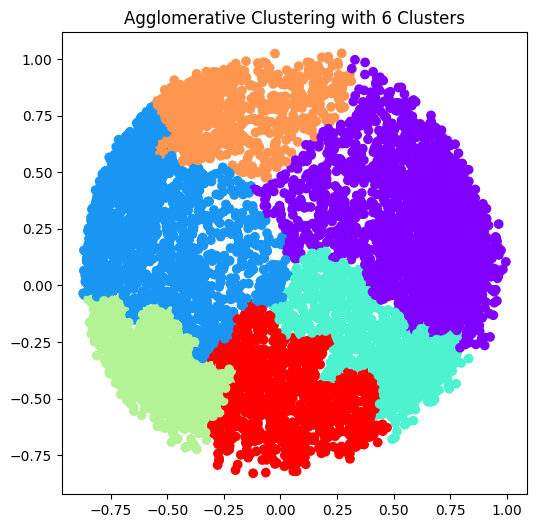

Silhouette Score for 6 clusters: 0.31328348567703357


In [18]:
# Agglomerative Clustering with different cluster sizes and silhouette score evaluation
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []

for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    cluster_labels = ac.fit_predict(df_principal)

    # Visualize the clustering results
    plt.figure(figsize=(6, 6))
    plt.scatter(df_principal['P1'], df_principal['P2'], c=cluster_labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {k} Clusters')
    plt.show()

    # Calculate and store silhouette score
    silhouette_avg = silhouette_score(df_principal, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

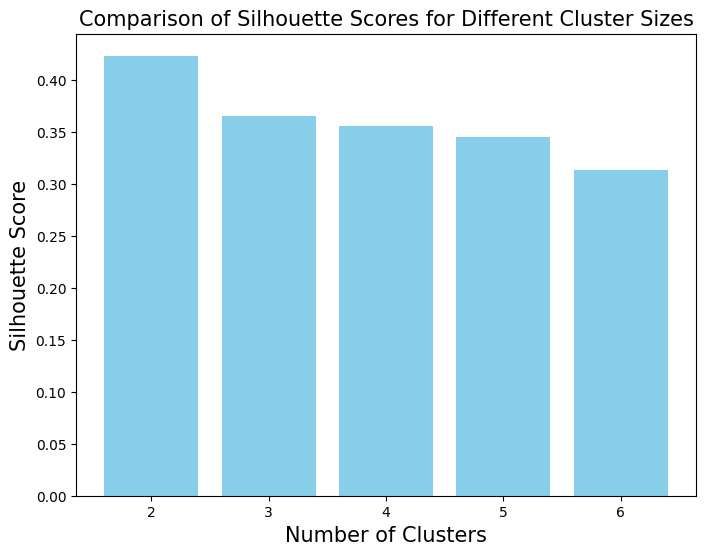


Silhouette Scores for Different Cluster Sizes:
2 clusters: 0.42321402815016196
3 clusters: 0.3648192664791028
4 clusters: 0.3557687266714984
5 clusters: 0.3450420282319213
6 clusters: 0.31328348567703357


In [19]:

# Visualizing the silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette Score', fontsize=15)
plt.title('Comparison of Silhouette Scores for Different Cluster Sizes', fontsize=15)
plt.show()

# Final output of silhouette scores for comparison
print("\nSilhouette Scores for Different Cluster Sizes:")
for i, k in enumerate(k_values):
    print(f"{k} clusters: {silhouette_scores[i]}")
